In [ ]:
# 0. Найти датасет. 
# 1. Сделать регрессию с помощью МНК, подобрать оптимальную степень многочлена. Здесь можно использовать готовые библиотеки.
# 2. Построить гистограмму ошибок и посмотреть, похоже ли это на нормальное распределение с нулевым мат ожиданием. (можно проверить гипотезу о распределении)
# 3.1 Если распределение выглядит как нормальное, добавить в датасет шумы
# 3. Построить М оценки Тьюки и Хьюбера. Здесь нужно выписать функцию для минимизации и каким-то готовым численным методом найти минимум (Классический градиентный спуск, кажется, не прокатит, функция не выпукла). В качестве начального приближения использовать оценку МНК

In [46]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
# Аппроксимация при помощи МНК


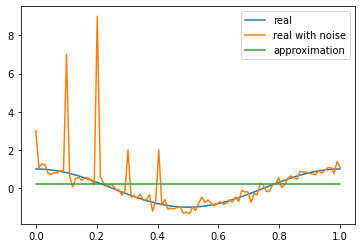

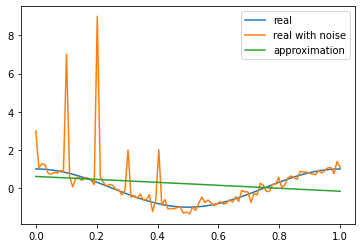

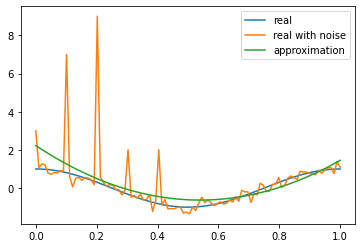

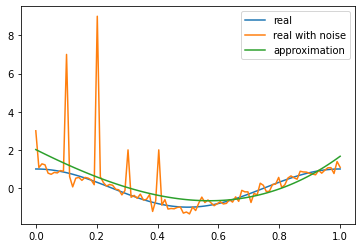

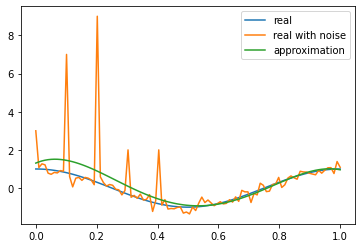

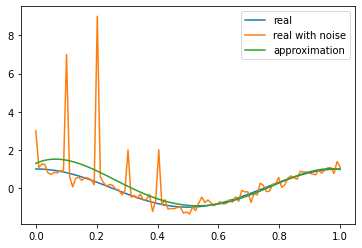

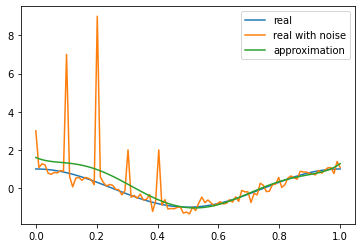

In [48]:
max_power = 7

def real_func(x):
    return np.cos(2 * np.pi * x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, y, x):
    ret = y - fit_func(p, x)
    return ret

x = np.linspace (0, 1, 100)

y0 = real_func(x)
np.random.seed(444)

y1 = [np.random.normal (0, 1) / 5 + y for y in y0] # Add noise

for i in range(0, 50, 10):
    y1[i] = np.random.randint(10)

for i in range(1, max_power + 1):
    p_init = np.random.randn(i)
    plsq = opt.leastsq(residuals_func, p_init, args=(y1, x))
    plt.plot(x, y0, label='real')
    plt.plot(x, y1, label='real with noise')
    plt.plot(x, fit_func(plsq[0], x), label='approximation')
    plt.legend()
    plt.show()

(array([11.,  9.,  4.,  1.,  4.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

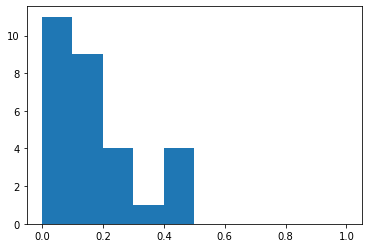

In [49]:
p_init5 = np.random.randn(5)
plsq5 = opt.leastsq(residuals_func, p_init5, args=(y1, x))
hist_bar = residuals_func(plsq5[0], y1, x)
plt.hist(hist_bar, range=(0,1))


In [50]:
np.mean(residuals_func(plsq5[0], y1, x))


2.0750121376700294e-09

In [51]:
def huber_loss(p, y, x, delta = 1.345):
    error = fit_func(p, x) - y
    is_small_error = np.abs(error) <= delta
    small_error_loss = np.square(error) / 2
    big_error_loss = delta * (np.abs(error) - 0.5*delta)
    return sum(np.where(is_small_error, small_error_loss, big_error_loss))

def tukey_loss(p, y, x, delta = 4.6851):
    error = fit_func(p, x) - y
    is_small_error = np.abs(error) <= delta
    small_error_loss = 1 - (1 - (error/delta)**2)**3
    return sum(np.where(is_small_error, small_error_loss, 1))


In [52]:
hubert = huber_loss(plsq5[0], y1, x)
tukey =  tukey_loss(plsq5[0], y1, x)
print("hubert=", hubert)
print("tukey=",  tukey)

hubert= 29.563979402898237
tukey= 5.3983819804965885


Desired error not necessarily achieved due to precision loss.


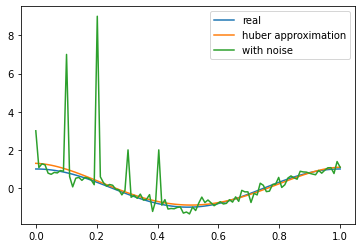

In [53]:
p_init =np.random.randn(5)
plsq_huber = opt.minimize(huber_loss, p_init, args=(y1, x))
print(plsq_huber["message"])
plt.plot(x, real_func(x), label='real')
plt.plot(x, fit_func(plsq_huber['x'], x), label='huber approximation')
plt.plot(x, y1, label='with noise')
plt.legend()
plt.show()

(array([17.,  6.,  6.,  4.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

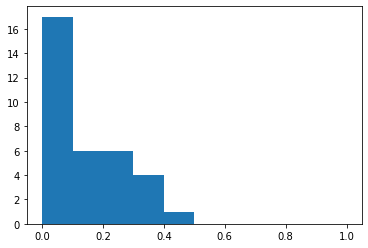

In [54]:
plt.hist(residuals_func(plsq_huber['x'], y1, x), range=(0,1))